# Tech Challenger - Etapa 1: Análise e Processamento

Como profissional responsável pelo desenvolvimento de um modelo preditivo de regressão para estimar os custos médicos individuais cobrados por seguros de saúde, utilizamos o conjunto de dados [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance/data) para validar hipóteses relacionadas aos fatores que impactam a definição dos custos dos planos de saúde.


## Objetivo

Nosso objetivo é analisar a estrutura dos dados, realizar a limpeza necessária e explorar questionamentos sobre os insights que podemos extrair a partir deles.

## Estrutura dos Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("dados/insurance.csv")
print("INFORMAÇÕES GERAIS DO DATASET\n")
data.info()

INFORMAÇÕES GERAIS DO DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
# Estatísticas descritivas
print("\nESTATÍSTICAS DESCRITIVAS")
display(data.describe())


ESTATÍSTICAS DESCRITIVAS


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
print(f"\nVALORES NULOS POR COLUNA:")
null_counts = data.isnull().sum()
if null_counts.sum() == 0:
    print("Não há valores nulos no dataset - dados completos!")
else:
    print(null_counts[null_counts > 0])


VALORES NULOS POR COLUNA:
Não há valores nulos no dataset - dados completos!


Algumas observações sobre os dados:

* O conjunto de dados contém 1338 entradas e 7 colunas.
* As colunas são: 'age' (idade), 'sex' (sexo), 'bmi' (IMC), 'children' (quantidade de filhos), 'smoker' (fumante ou não), 'region' (região que reside), e 'charges' (custos médicos).
* Não há valores ausentes em nenhuma das colunas, o que significa que o conjunto de dados está completo. Não vamos precisar fazer preenchimento com as medianas.
* Variáveis categóricas (vamos precisar tratar para colocar no modelo): 'sex', 'smoker' e 'region'
* Variáveis numéricas: 
    - 'age' e 'children' são inteiros.
    - 'bmi' e 'charges' são floats.
* A Variável Dependente do conjunto de dados é a coluna: 'charges', representando os custos médicos.

## Análise e Visualização dos Dados

Com isso, levantamos algumas questões relevantes sobre os dados analisados:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Pergunta 01:** Existem diferenças nos custos médios entre as regiões? 


Distribuição por Região: 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


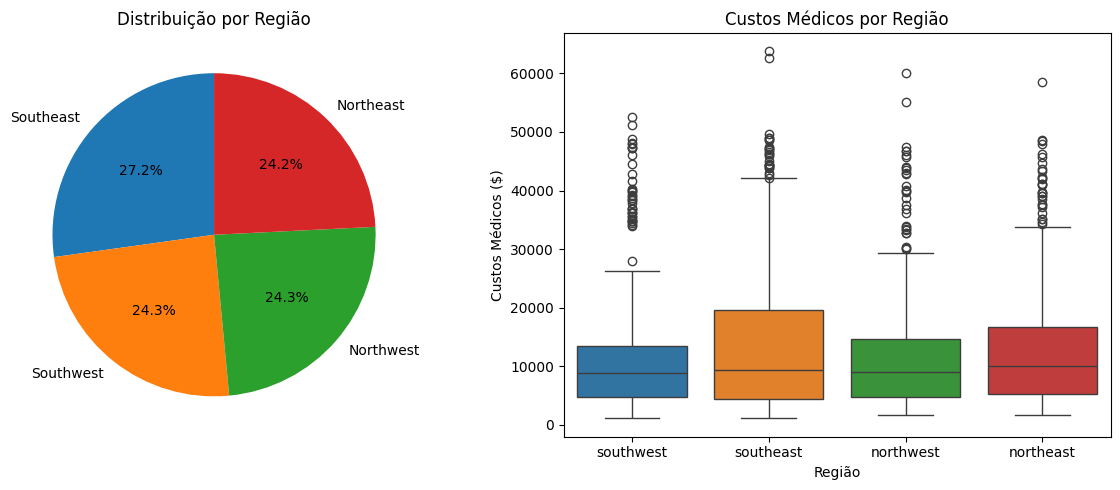

In [5]:
# Contagem por Região
region_counts = data['region'].value_counts()
labels_region = [label.title() for label in region_counts.index]
print(f"\nDistribuição por Região: \n", region_counts)

# Criar figura com 2 subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Pizza
axs[0].pie(region_counts, labels=labels_region, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribuição por Região')

# Boxplot dos custos médicos
sns.boxplot(x='region', y='charges', data=data, hue="region")
axs[1].set_title('Custos Médicos por Região')
axs[1].set_xlabel('Região')
axs[1].set_ylabel('Custos Médicos ($)')

# Layout ajustado
plt.tight_layout()
plt.show()

Não há diferenças significativas nos custos entre as regiões. As medianas dos custos são bastante próximas, indicando que a localização geográfica não é um fator determinante para os custos médicos. A quantidade de habitantes por região esta equilibrada.

### **Pergunta 02:** O hábito de fumar impacta os custos médicos? Fumantes têm custos médicos mais altos ou mais baixos?

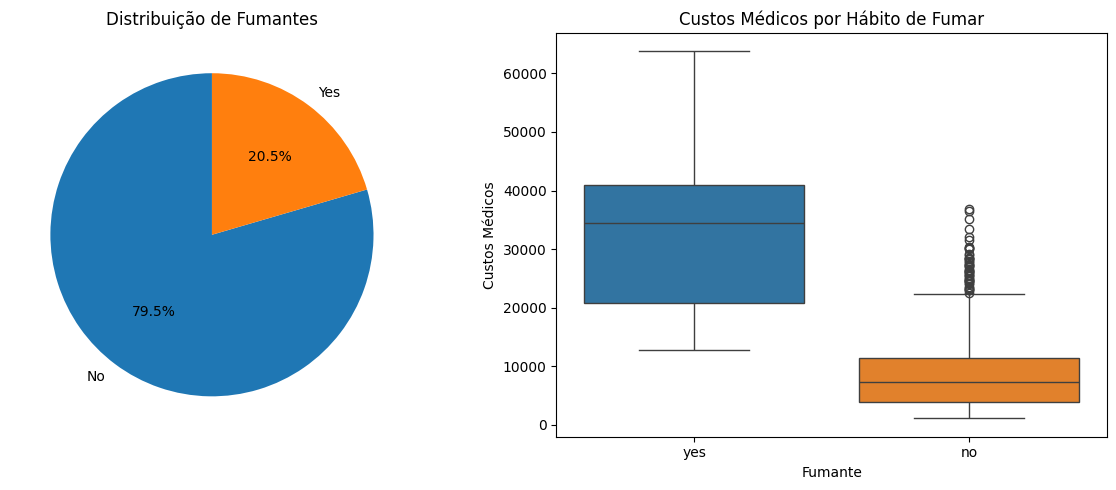

In [6]:
# Contagem de fumantes e não fumantes
smoker_counts = data['smoker'].value_counts()
labels_smoker = [label.title() for label in smoker_counts.index]

# Criar figura com 2 subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Pizza
axs[0].pie(smoker_counts, labels=labels_smoker, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribuição de Fumantes')

# Boxplot dos custos médicos
sns.boxplot(x='smoker', y='charges', data=data, hue="smoker")
axs[1].set_title('Custos Médicos por Hábito de Fumar')
axs[1].set_xlabel('Fumante')
axs[1].set_ylabel('Custos Médicos')

# Layout ajustado
plt.tight_layout()
plt.show()


Fumantes têm custos médicos significativamente mais altos em comparação com não fumantes, com isso sabemos que o hábito de fumar é um dos principais fatores que influenciam nos custos do plano de saúde.

### **Pergunta 03:** O sexo influencia os gastos com saúde?


Distribuição por Sexo: 
 sex
male      676
female    662
Name: count, dtype: int64


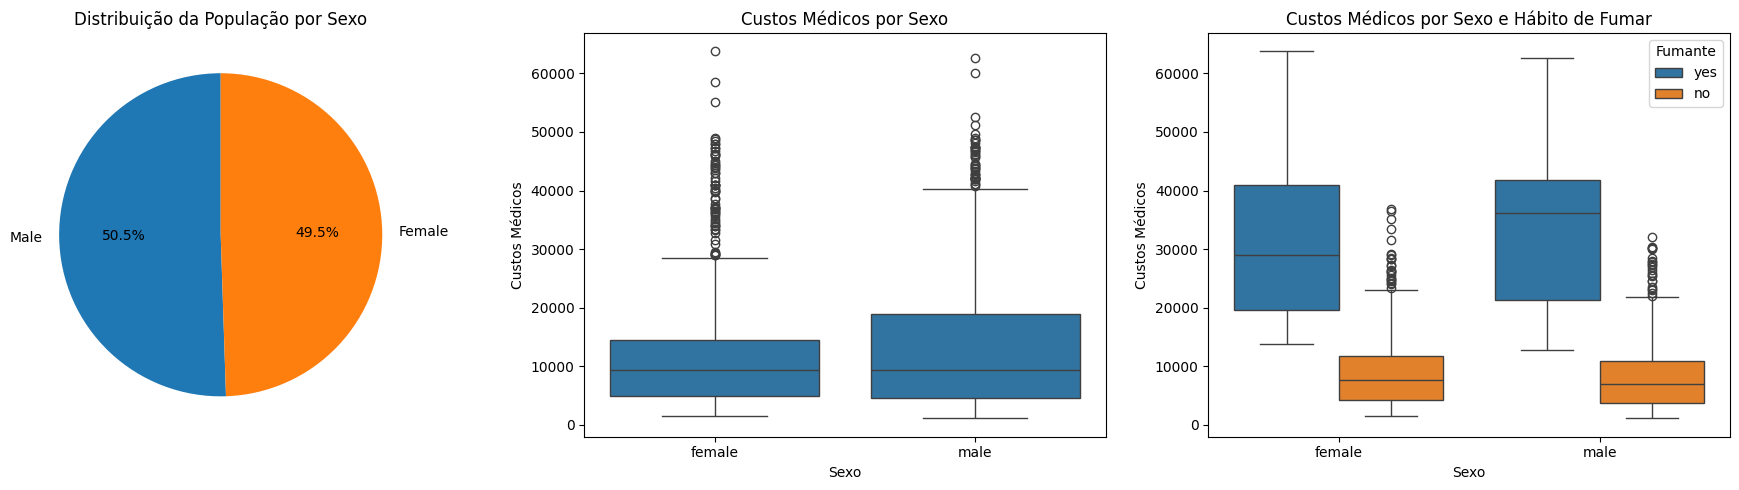

In [7]:
# Contagem por sexo
sex_counts = data['sex'].value_counts()
labels_sex = [label.title() for label in sex_counts.index]
print(f"\nDistribuição por Sexo: \n", sex_counts)

# Criar uma figura com 3 subplots organizados em 1 linha e 3 colunas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de Pizza - Distribuição por Sexo
axs[0].pie(sex_counts, labels=labels_sex, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribuição da População por Sexo')

# Boxplot - Custos Médicos por Sexo
sns.boxplot(x='sex', y='charges', data=data, ax=axs[1])
axs[1].set_title('Custos Médicos por Sexo')
axs[1].set_xlabel('Sexo')
axs[1].set_ylabel('Custos Médicos')

# Boxplot - Custos Médicos por Sexo e Hábito de Fumar
sns.boxplot(x='sex', y='charges', hue='smoker', data=data, ax=axs[2])
axs[2].set_title('Custos Médicos por Sexo e Hábito de Fumar')
axs[2].set_xlabel('Sexo')
axs[2].set_ylabel('Custos Médicos')
axs[2].legend(title='Fumante')

# Ajustar layout
plt.tight_layout()
plt.show()


Não há diferenças significativas nos custos médicos entre homens e mulheres. As distribuições são bastante semelhantes, mesmo com os valores indicando um custo maximo maior para os pacientes do sexo masculino, talvez o sexo seja é um fator tão relevante para os custos médicos. Vamos precisar verificar melhor ao construir o modelo de previsão. A quantidade de habitantes por sexo esta equilibrada.

### **Pergunta 04:** O IMC (índice de massa corporal), presente no campo BMI dos dados, tem impacto nos custos médicos?

Primeiramente, vamos realizar uma classificação dos dados BMI em [Condições de Peso](https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk.html) para visualizar melhor os tipos de habitantes.

In [8]:
# IMC entre 25,0 e 29,9 Kg/m2: sobrepeso; 
# IMC entre 30,0 e 34,9 Kg/m2: obesidade grau I; 
# IMC entre 35,0 e 39,9 Kg/m2: obesidade grau II; 
# IMC maior do que 40,0 Kg/m2: obesidade grau III.
data["weight_condition"] = ""
for col in [data]:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"


Distribuição por Condição de Peso: 
 weight_condition
Obese            707
Overweight       386
Normal Weight    225
Underweight       20
Name: count, dtype: int64


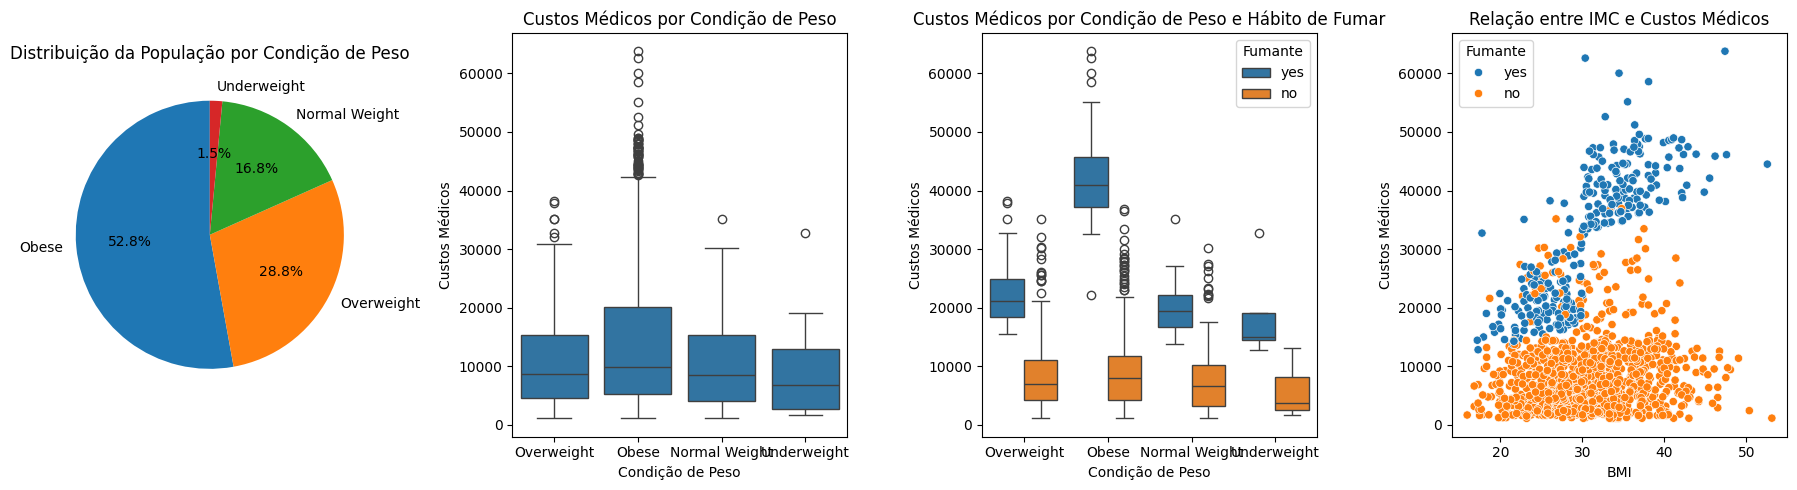

In [9]:
# Contagem por Weight Condition
weight_condition_counts = data['weight_condition'].value_counts()
labels_weight_condition = [label.title() for label in weight_condition_counts.index]
print(f"\nDistribuição por Condição de Peso: \n", weight_condition_counts)

# Criar uma figura com 3 subplots organizados em 1 linha e 3 colunas
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Gráfico de Pizza - Distribuição por Obesidade
axs[0].pie(weight_condition_counts, labels=labels_weight_condition, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribuição da População por Condição de Peso')

# Boxplot - Custos Médicos por Obesidade
sns.boxplot(x='weight_condition', y='charges', data=data, ax=axs[1])
axs[1].set_title('Custos Médicos por Condição de Peso')
axs[1].set_xlabel('Condição de Peso')
axs[1].set_ylabel('Custos Médicos')


# Boxplot - Custos Médicos por Sexo e Hábito de Fumar
sns.boxplot(x='weight_condition', y='charges', hue='smoker', data=data, ax=axs[2])
axs[2].set_title('Custos Médicos por Condição de Peso e Hábito de Fumar')
axs[2].set_xlabel('Condição de Peso')
axs[2].set_ylabel('Custos Médicos')
axs[2].legend(title='Fumante')

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
axs[3].set_title('Relação entre IMC e Custos Médicos')
axs[3].set_xlabel('BMI')
axs[3].set_ylabel('Custos Médicos')
axs[3].legend(title='Fumante')

# Ajustar layout
plt.tight_layout()
plt.show()

Não há uma relação forte entre IMC e custos médicos para os casos de Não Fumantes, mas os Fumantes tendem a elevar muito essas custos conforme a categoria do peso aumenta. Assim podemos verificar que fumantes com IMC elevado tendem a ter custos médicos mais altos, enquanto não fumantes apresentam uma relação mais dispersa. Podemos inferir que as duas variáveis juntas tem alto impacto nos custos, logo iremos utilizar as duas no modelo.

### **Pergunta 05:** Como os custos médicos variam com a idade?

Contagem por faixa etária (década):


age_decade
10+    137
20+    280
30+    257
40+    279
50+    271
60+    114
Name: count, dtype: int64

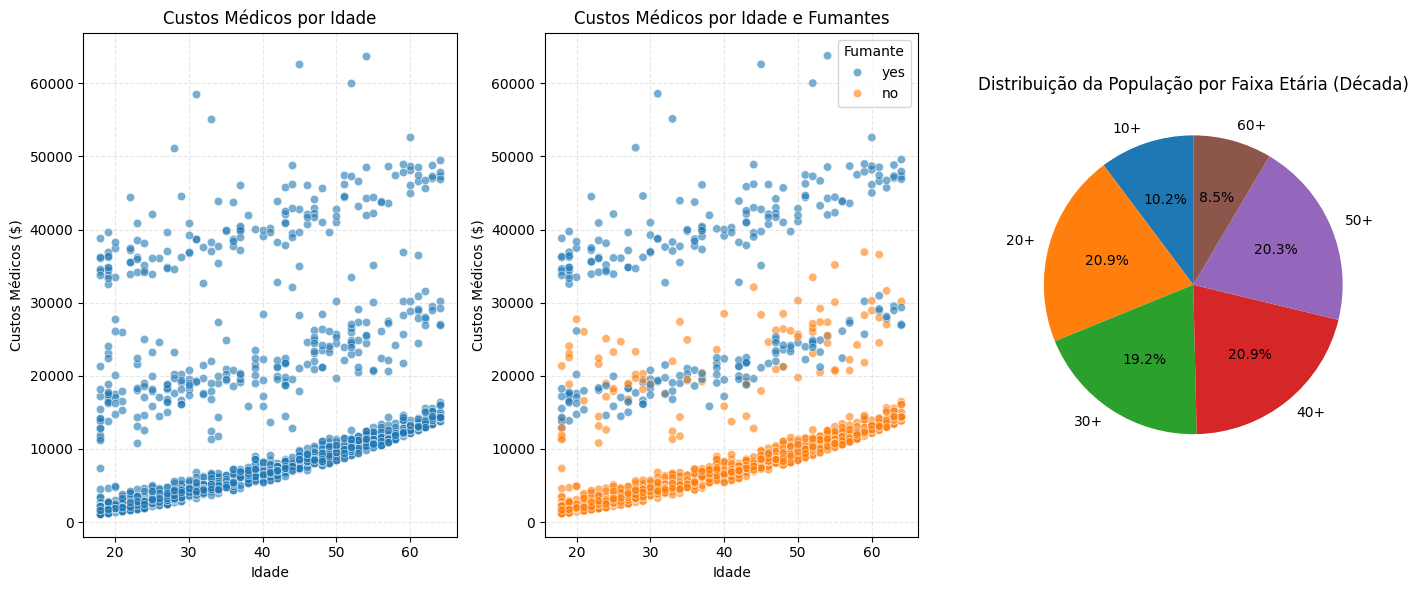

In [10]:
# Criar uma coluna de faixa etária por década (ex: 20+, 30+, ...)
data['age_decade'] = (data['age'] // 10 * 10).astype(int).astype(str) + '+'

# Contagem por faixa etária
age_decade_counts = data['age_decade'].value_counts().sort_index()
print("Contagem por faixa etária (década):")
display(age_decade_counts)


# Criar a figura com 2 subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Gráfico 1 - Custos Médicos por Idade (Geral)
sns.scatterplot(data=data, x="age", y="charges", alpha=0.6, ax=axs[0])
axs[0].set_title("Custos Médicos por Idade")
axs[0].set_xlabel("Idade")
axs[0].set_ylabel("Custos Médicos ($)")
axs[0].grid(True, linestyle='--', alpha=0.3)

# Gráfico 2 - Custos Médicos por Idade e Hábito de Fumar
sns.scatterplot(data=data, x="age", y="charges", hue="smoker", alpha=0.6, ax=axs[1])
axs[1].set_title("Custos Médicos por Idade e Fumantes")
axs[1].set_xlabel("Idade")
axs[1].set_ylabel("Custos Médicos ($)")
axs[1].grid(True, linestyle='--', alpha=0.3)
axs[1].legend(title="Fumante")

# Gráfico de pizza das faixas etárias
plt.pie(age_decade_counts, labels=age_decade_counts.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Distribuição da População por Faixa Etária (Década)')

# Ajustar layout
plt.tight_layout()
plt.show()


data = data.drop(['age_decade'], axis='columns')

Os custos médicos aumentam com a idade, indicando que pessoas mais velhas tendem a ter despesas médicas mais altas. Isso pode estar relacionado ao aumento de problemas de saúde com o envelhecimento, sendo assim a idade é uma das variáveis que vamos utilizar no nosso modelo. A maioria das idades está bem distribuída entre 18 e 64 anos, sem grandes concentrações em uma faixa específica.

### **Pergunta 06:** A presença de filhos altera significativamente os gastos médicos?

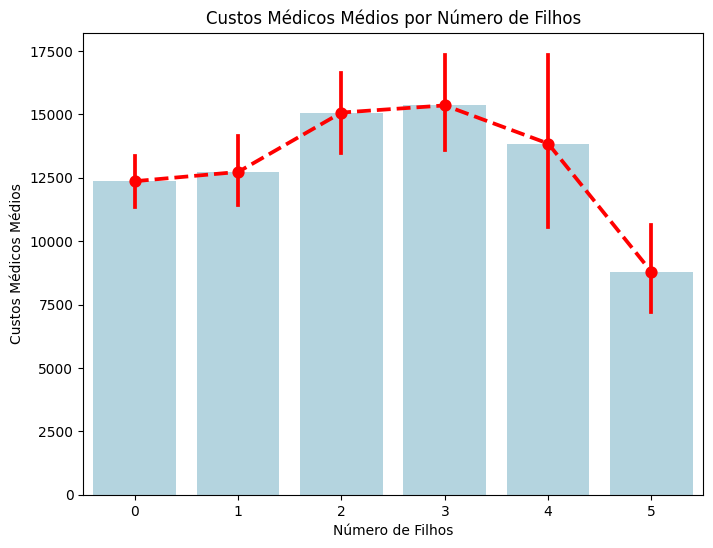

In [11]:
plt.figure(figsize=(8,6))

# Gráfico de barras com médias
sns.barplot(x='children', y='charges', data=data, color='lightblue', errorbar=None)

# Linha de tendência (pointplot conecta as médias)
sns.pointplot(x='children', y='charges', data=data, color='red', markers='o', linestyles='--')

plt.title('Custos Médicos Médios por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Custos Médicos Médios')

plt.show()


O número de filhos exerce pouca influência nos custos médicos. No entanto, observa-se que, a partir de cinco filhos, há uma redução nos custos médios. Apesar disso, não é possível afirmar que o acréscimo de dados manteria essa tendência de redução nos valores dos planos devido a falta de informações na base analisada.

### **Distribuição dos Custos Médicos**

**Gráfico:** Histograma de charges.

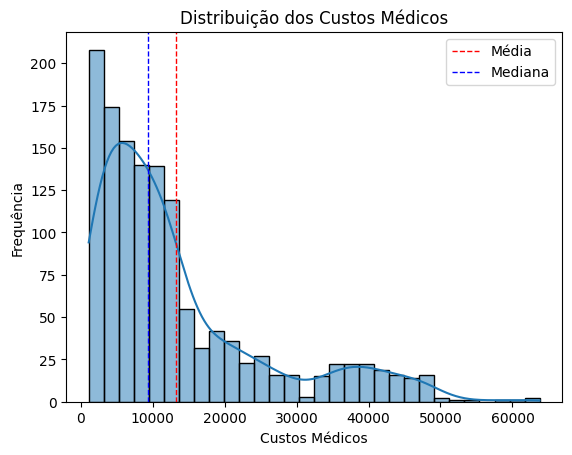

In [12]:
sns.histplot(data['charges'], kde=True, bins=30)
plt.title('Distribuição dos Custos Médicos')
plt.xlabel('Custos Médicos')
plt.ylabel('Frequência')
plt.axvline(data['charges'].mean(), color='red', linestyle='dashed', linewidth=1, label='Média')
plt.axvline(data['charges'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
plt.legend()
plt.show()

No gráfico de barras (histograma), cada barra representa o numero de pessoas que gastaram uma certa faixa de valores. Por exemplo, uma barra pode mostrar quantas pessoas gastaram entre R$ 1.000 e R$ 2.000, outra entre R$ 2.000 e R$ 3.000, e assim por diante. Isso é chamado de frequência — o número de pessoas em cada faixa de custo.

Conforme vimos nesse gráfico, a maioria das pessoas está nas barras mais à esquerda, ou seja, gastaram valores mais baixos. Isso significa que a maior parte das pessoas tem custos médicos menores.

A cauda longa aparece porque, mesmo que a maioria das pessoas gaste pouco, ainda existem algumas pessoas que gastam valores muito altos, à direita no gráfico. Isso pode acontecer, por exemplo, porque elas têm problemas de saúde mais graves ou condições que exigem tratamentos caros.


**Conclusão:** A distribuição dos custos médicos é assimétrica à direita, com a maioria dos valores concentrados em faixas mais baixas. Há uma cauda longa indicando que algumas pessoas têm custos médicos muito altos, possivelmente devido a condições de saúde graves. Conforme vimos nos gráficos anteriores podemos supor que as variáveis aptas ao modelo são **smoker** (Fumante), **age** (Idade) e **bmi** (IMC), onde apresentam um impacto maior nos custos podendo elevá-los e essas podem ser as variaveis que impactam nessa cauda.

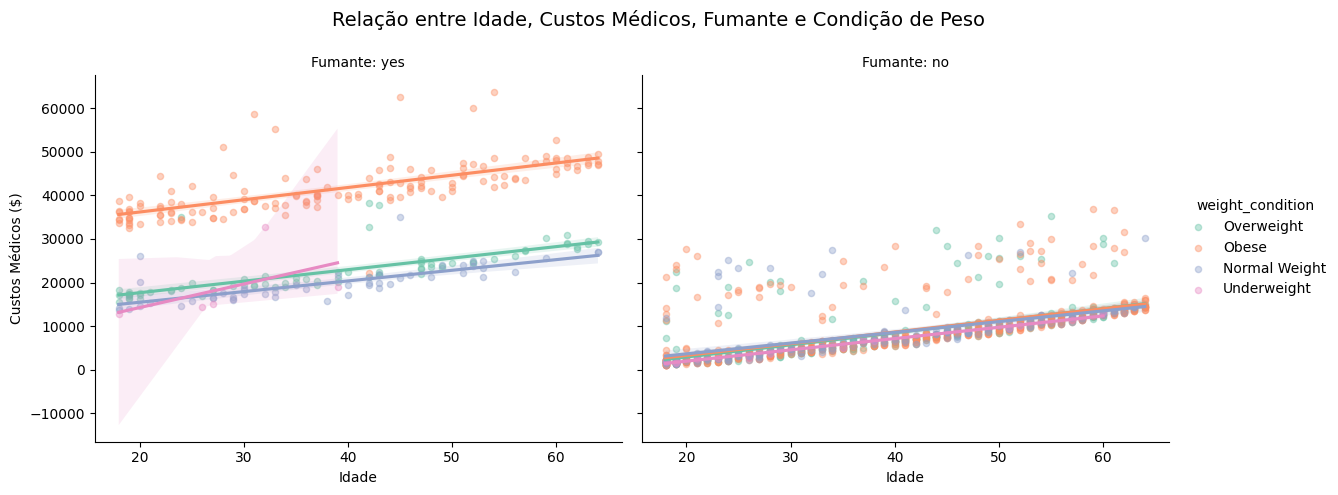

In [13]:
# Gráfico de dispersão: charges vs age, colorido por weight_condition e separado por smoker
g = sns.lmplot(
    data=data,
    x="age",
    y="charges",
    hue="weight_condition",
    col="smoker",
    scatter_kws={"s": 20, "alpha": 0.4},
    height=5,
    aspect=1.2,
    markers="o",
    palette="Set2",
    legend=True
)
g.set_axis_labels("Idade", "Custos Médicos ($)")
g.set_titles("Fumante: {col_name}")
plt.subplots_adjust(top=0.85)
plt.suptitle("Relação entre Idade, Custos Médicos, Fumante e Condição de Peso", fontsize=14)
plt.show()

In [14]:
print("PRINCIPAIS INSIGHTS DA ANÁLISE\n")

# Insight 1: Impacto do tabagismo
smoker_impact = data.groupby('smoker')['charges'].mean()
impact_ratio = smoker_impact['yes'] / smoker_impact['no']
print(f"1. TABAGISMO:")
print(f"   • Fumantes pagam {impact_ratio:.1f}x mais que não fumantes")
print(f"   • Diferença média: ${smoker_impact['yes'] - smoker_impact['no']:.0f}")

# Insight 2: Impacto da idade
age_correlation = data['age'].corr(data['charges'])
print(f"\n2. IDADE:")
print(f"   • Correlação com custos: {age_correlation:.3f}")
print(f"   • A cada ano adicional: ~${(data['charges'].max() - data['charges'].min()) / (data['age'].max() - data['age'].min()):.0f} de aumento")

# Insight 3: Impacto do IMC
bmi_obese = data[data['bmi'] == 'Obesidade']['charges'].mean()
bmi_normal = data[data['bmi'] == 'Peso normal']['charges'].mean()
print(f"\n3. IMC:")
print(f"   • Pessoas obesas pagam ${bmi_obese - bmi_normal:.0f} a mais que peso normal")
print(f"   • Aumento percentual: {((bmi_obese / bmi_normal) - 1) * 100:.1f}%")

# Insight 4: Combinação de fatores
high_risk = data[(data['smoker'] == 'yes') & (data['bmi'] >= 30)]
low_risk = data[(data['smoker'] == 'no') & (data['bmi'] < 25)]

if len(high_risk) > 0 and len(low_risk) > 0:
    print(f"\n4. PERFIL DE RISCO:")
    print(f"   • Alto risco (fumante + obeso): ${high_risk['charges'].mean():.0f}")
    print(f"   • Baixo risco (não fumante + peso normal): ${low_risk['charges'].mean():.0f}")
    print(f"   • Diferença: {high_risk['charges'].mean() / low_risk['charges'].mean():.1f}x")

PRINCIPAIS INSIGHTS DA ANÁLISE

1. TABAGISMO:
   • Fumantes pagam 3.8x mais que não fumantes
   • Diferença média: $23616

2. IDADE:
   • Correlação com custos: 0.299
   • A cada ano adicional: ~$1362 de aumento

3. IMC:
   • Pessoas obesas pagam $nan a mais que peso normal
   • Aumento percentual: nan%

4. PERFIL DE RISCO:
   • Alto risco (fumante + obeso): $41558
   • Baixo risco (não fumante + peso normal): $7516
   • Diferença: 5.5x


Resultados
* Não há diferenças significativas nos custos entre as regiões. 
* Fumantes têm custos médicos significativamente mais altos em comparação com não fumantes.
* Não há diferenças significativas nos custos médicos entre homens e mulheres. 
* Fumantes com IMC elevado tendem a ter custos médicos mais altos.
* Os custos médicos aumentam com a idade.

Logo, os custos são impactados com o habito de fumo e aumentam conforme a idade e o peso.

## Pré Processamento dos Dados

Nessa etapa nós iremos realizar um processamento dos dados para que eles possam ser colocados no modelo preditivo.
Conforme vimos na análise e visualiação de dados, temos o seguinte:
* Como não existem valores nulos, não precisaremos realizar preenchimento dos mesmos, o que no caso poderia ser com a mediana dos valores.
* Temos colunas categóricas que precisam ser processadas para entrar no modelo. São elas: **sex**, **smoker** e **region**. Utilizaremos um **One-Hot Encoding**.
* Vamos remover os outliers possiveis dos dados para evitar discrepancias enormes.
* A Variavel dependente a ser prevista é a coluna **charges**.
* As colunas com maior potencial de alteração no modelo são: **smoker**, **age** e **bmi**.

### Transformação dos Dados Categoricos

Para criação do modelo não podemos utilizar as colunas categoricas como elas estão, em forma de texto. Precisamos transforma-las em números.
Não podemos colocar qualquer número, por isso precisamos criar novas colunas a partir das categoricas e para cada uma, a nova coluna tera um valor correspondente a 1 ou 0 para indicar a presença da caracteristica. Isso é o que chamamos de One Hot Encoding.

No exemplo desses dados, a coluna smoker, apresenta dois dados possiveis:

In [15]:
print(data['smoker'].value_counts())

smoker
no     1064
yes     274
Name: count, dtype: int64


Pelo One Hot Encoding, iremos construir duas novas colunas: smoker_yes e smoker_no.
onde smoker_yes recebe 1 para quem é fumante e 0 para quem não tem a caracteristica. O contrario para a coluna smoker_no.
Faremos isso para todos os dados categoricos do conjunto.

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ['sex', 'smoker', 'region', 'weight_condition']

# Criando um pre-processar para transformar as variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns) # categorical features
])

# Aplicar a transformação das categorias e nivelamento dos dados
base_transformed = preprocessor.fit_transform(data)
base_transformed_df = pd.DataFrame(base_transformed, columns=preprocessor.get_feature_names_out())
data_encoded = pd.concat([data.drop(columns=categorical_columns), base_transformed_df], axis=1)
data_encoded.head()

,age,bmi,children,charges,cat__sex_female,cat__sex_male,cat__smoker_no,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest,cat__weight_condition_Normal Weight,cat__weight_condition_Obese,cat__weight_condition_Overweight,cat__weight_condition_Underweight
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Análise de Outliers


Outlier é um item que se desvia significativamente do restante dos itens. Identificar outliers é importante em estatística e análise de dados, pois eles podem ter um impacto significativo nos resultados de análises estatísticas, distorcendo estatisticas.
Eles podem ser causados por erros de medição, amostragem, erros experimentais ou ate mesmo amostragens de multiplas populações.

Maior valor de charges: 63770.42801
Menor valor de charges: 1121.8739


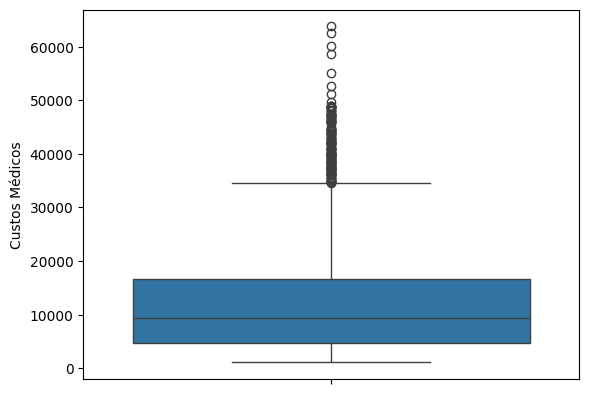

In [17]:
max_charge = data['charges'].max()
min_charge = data['charges'].min()

print(f"Maior valor de charges: {max_charge}")
print(f"Menor valor de charges: {min_charge}")

sns.boxplot(data['charges'])
plt.ylabel('Custos Médicos')
plt.show()


Nós temos dois metodos de remoção:

O **IQR (Interquartile Range)**, ou intervalo interquartil, é uma técnica estatística usada para identificar e remover outliers (valores extremos) em um conjunto de dados. Ele é baseado nos quartis, que dividem os dados em quatro partes iguais.

Ele é robusto contra valores extremos, pois se baseia nos quartis e não na média.
Ajuda a limpar os dados, **removendo valores que podem distorcer análises ou modelos preditivos**.


In [18]:
import numpy as np

Q1, Q3 = np.percentile(data['charges'], [25, 75])
print(f"Q1: {Q1}") # separa os 25% menores valores do conjunto de dados.
print(f"Q3: {Q3}") # separa os 25% maiores valores do conjunto de dados.

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Limite Inferior: {lower_bound}")
print(f"Limite Superior: {upper_bound}")

data_no_outliers = data[(data['charges'] >= lower_bound) & (data['charges'] <= upper_bound)]
data_no_outliers.head()

Q1: 4740.28715
Q3: 16639.912515
Limite Inferior: -13109.1508975
Limite Superior: 34489.350562499996


,age,sex,bmi,children,smoker,region,charges,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


Maior valor de charges: 34472.841
Menor valor de charges: 1121.8739
Original DataFrame Shape: (1338, 8)
DataFrame Shape after Removing Outliers: (1199, 8)


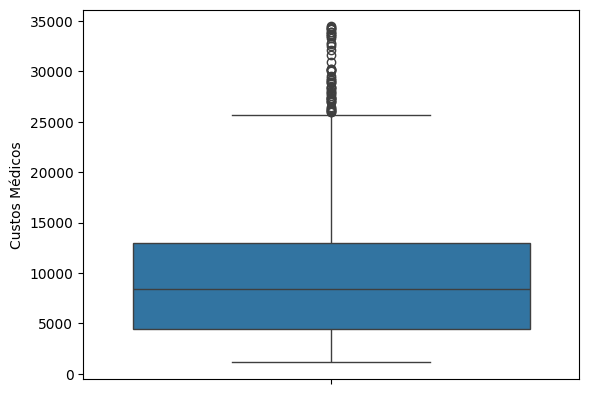

In [19]:
max_charge = data_no_outliers['charges'].max()
min_charge = data_no_outliers['charges'].min()

print(f"Maior valor de charges: {max_charge}")
print(f"Menor valor de charges: {min_charge}")

print("Original DataFrame Shape:", data.shape)
print("DataFrame Shape after Removing Outliers:", data_no_outliers.shape)

sns.boxplot(data_no_outliers['charges'])
plt.ylabel('Custos Médicos')
plt.show()

Maior valor de charges: 63770.42801
Menor valor de charges: 1121.8739
Maior valor de bmi: 53.13
Menor valor de bmi: 15.96
Maior valor de age: 64
Menor valor de age: 18


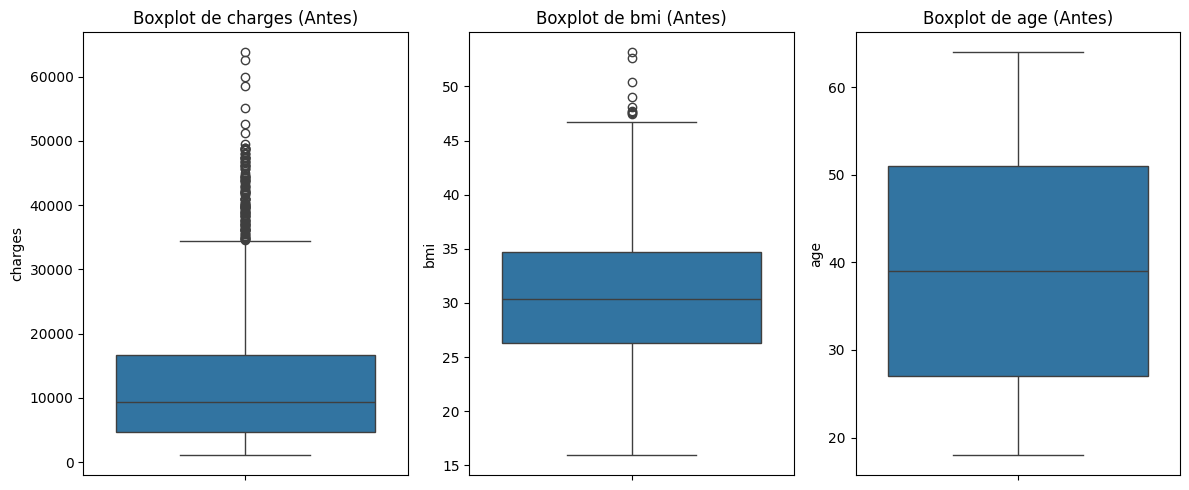

Maior valor de charges: 34472.841
Menor valor de charges: 1121.8739
Maior valor de bmi: 45.43
Menor valor de bmi: 15.96
Maior valor de age: 64
Menor valor de age: 18


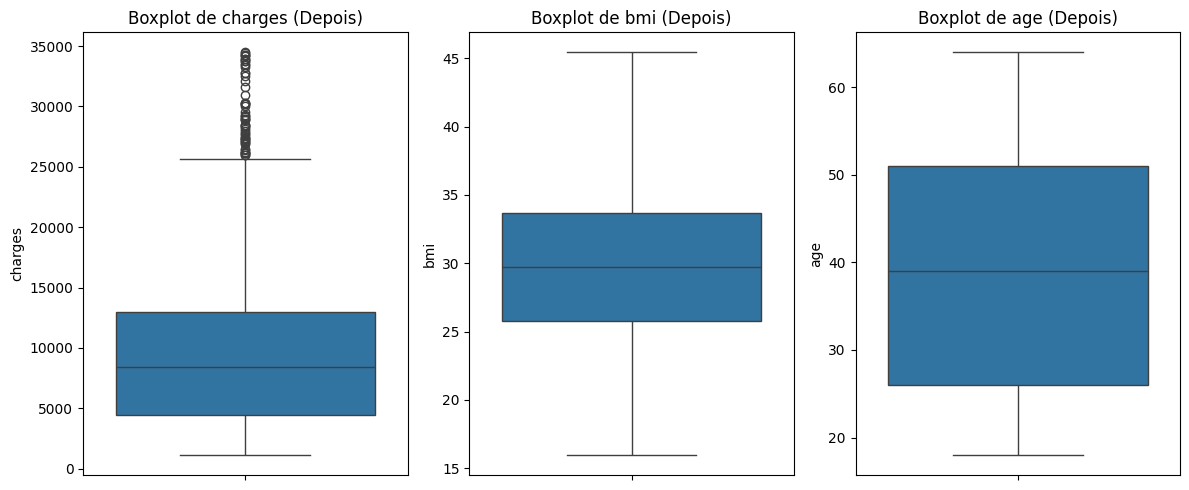

Formato original do DataFrame: (1338, 8)
Formato após remoção dos outliers: (1186, 8)


,age,sex,bmi,children,smoker,region,charges,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Copiar o dataset original para trabalhar sem risco
data_no_outliers = data.copy()

# Lista das colunas para analisar
columns = ['charges', 'bmi', 'age']

# Criar subplots para boxplots antes da remoção dos outliers
fig, axs = plt.subplots(1, len(columns), figsize=(12, 5))

for i, column in enumerate(columns):
    sns.boxplot(y=data_no_outliers[column], ax=axs[i])
    axs[i].set_title(f'Boxplot de {column} (Antes)')
    axs[i].set_ylabel(column)
    
    max_column = data_no_outliers[column].max()
    min_column = data_no_outliers[column].min()
    print(f"Maior valor de {column}: {max_column}")
    print(f"Menor valor de {column}: {min_column}")

plt.tight_layout()
plt.show()

# Remover outliers usando IQR para cada coluna
for column in columns:
    Q1 = data_no_outliers[column].quantile(0.25)
    Q3 = data_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_no_outliers = data_no_outliers[
        (data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)
    ]

# Criar subplots para boxplots depois da remoção dos outliers
fig, axs = plt.subplots(1, len(columns), figsize=(12, 5))

for i, column in enumerate(columns):
    sns.boxplot(y=data_no_outliers[column], ax=axs[i])
    axs[i].set_title(f'Boxplot de {column} (Depois)')
    axs[i].set_ylabel(column)
    
    max_column = data_no_outliers[column].max()
    min_column = data_no_outliers[column].min()
    print(f"Maior valor de {column}: {max_column}")
    print(f"Menor valor de {column}: {min_column}")

plt.tight_layout()
plt.show()

# Mostrar resultado da remoção
print("Formato original do DataFrame:", data.shape)
print("Formato após remoção dos outliers:", data_no_outliers.shape)

data_no_outliers.head()


O **Z-Score** é uma métrica estatística que mede o quão distante um valor está da média em termos de desvios padrão.
Para cada valor no conjunto de dados, o Z-Score é calculado como:  

(valor do dado - média do conjunto de dados) / desvio padrão do conjunto de dados.

* Um Z-Score de 0 significa que o valor está exatamente na média.
* Valores positivos indicam que o dado está acima da média, enquanto valores negativos indicam que está abaixo.
* Quanto maior (ou menor) o Z-Score, mais distante o valor está da média.
* Valores com Z-Scores muito altos ou muito baixos (geralmente acima de 3 ou abaixo de -3) são considerados outliers, pois estão muito distantes da média.

Ele é útil para detectar outliers em dados que seguem uma distribuição aproximadamente normal.
É uma abordagem simples e eficaz para identificar valores extremos em relação à média e ao desvio padrão.

In [21]:
from scipy.stats import zscore

data_with_zscore = data.copy() 
data_with_zscore['z_score'] = zscore(data['charges']) # Calcular o Z-Score para a coluna 'charges'

# Filtrar os dados para manter apenas os valores com Z-Score entre -3 e 3
data_no_outliers_z = data_with_zscore[(data_with_zscore['z_score'] > -3) & (data_with_zscore['z_score'] < 3)]
data_no_outliers_z = data_no_outliers_z.drop(columns=['z_score'])
data_no_outliers_z.head()

,age,sex,bmi,children,smoker,region,charges,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


Maior valor de charges: 49577.6624
Menor valor de charges: 1121.8739
Original DataFrame Shape: (1338, 8)
DataFrame Shape after Removing Outliers: (1331, 8)


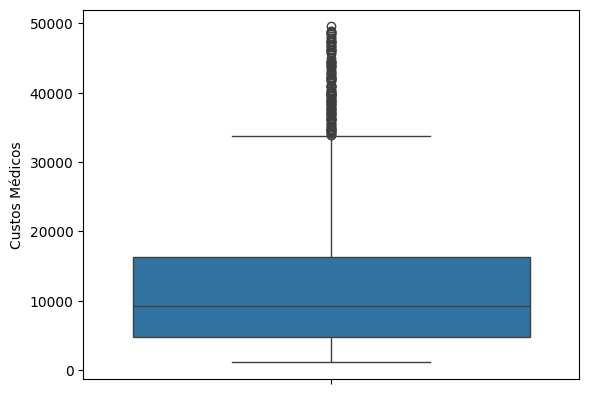

In [22]:
max_charge = data_no_outliers_z['charges'].max()
min_charge = data_no_outliers_z['charges'].min()

print(f"Maior valor de charges: {max_charge}")
print(f"Menor valor de charges: {min_charge}")

print("Original DataFrame Shape:", data.shape)
print("DataFrame Shape after Removing Outliers:", data_no_outliers_z.shape)

sns.boxplot(data_no_outliers_z['charges'])
plt.ylabel('Custos Médicos')
plt.show()

Comparando as duas abordagens:

ANÁLISE DE OUTLIERS

CHARGES:
• Outliers (IQR): 139 (10.4%)
• Outliers (Z-score): 7 (0.5%)
• Limites IQR: [-13109.15, 34489.35]

AGE:
• Outliers (IQR): 0 (0.0%)
• Outliers (Z-score): 0 (0.0%)
• Limites IQR: [-9.00, 87.00]

BMI:
• Outliers (IQR): 9 (0.7%)
• Outliers (Z-score): 4 (0.3%)
• Limites IQR: [13.70, 47.29]

CHILDREN:
• Outliers (IQR): 0 (0.0%)
• Outliers (Z-score): 18 (1.3%)
• Limites IQR: [-3.00, 5.00]


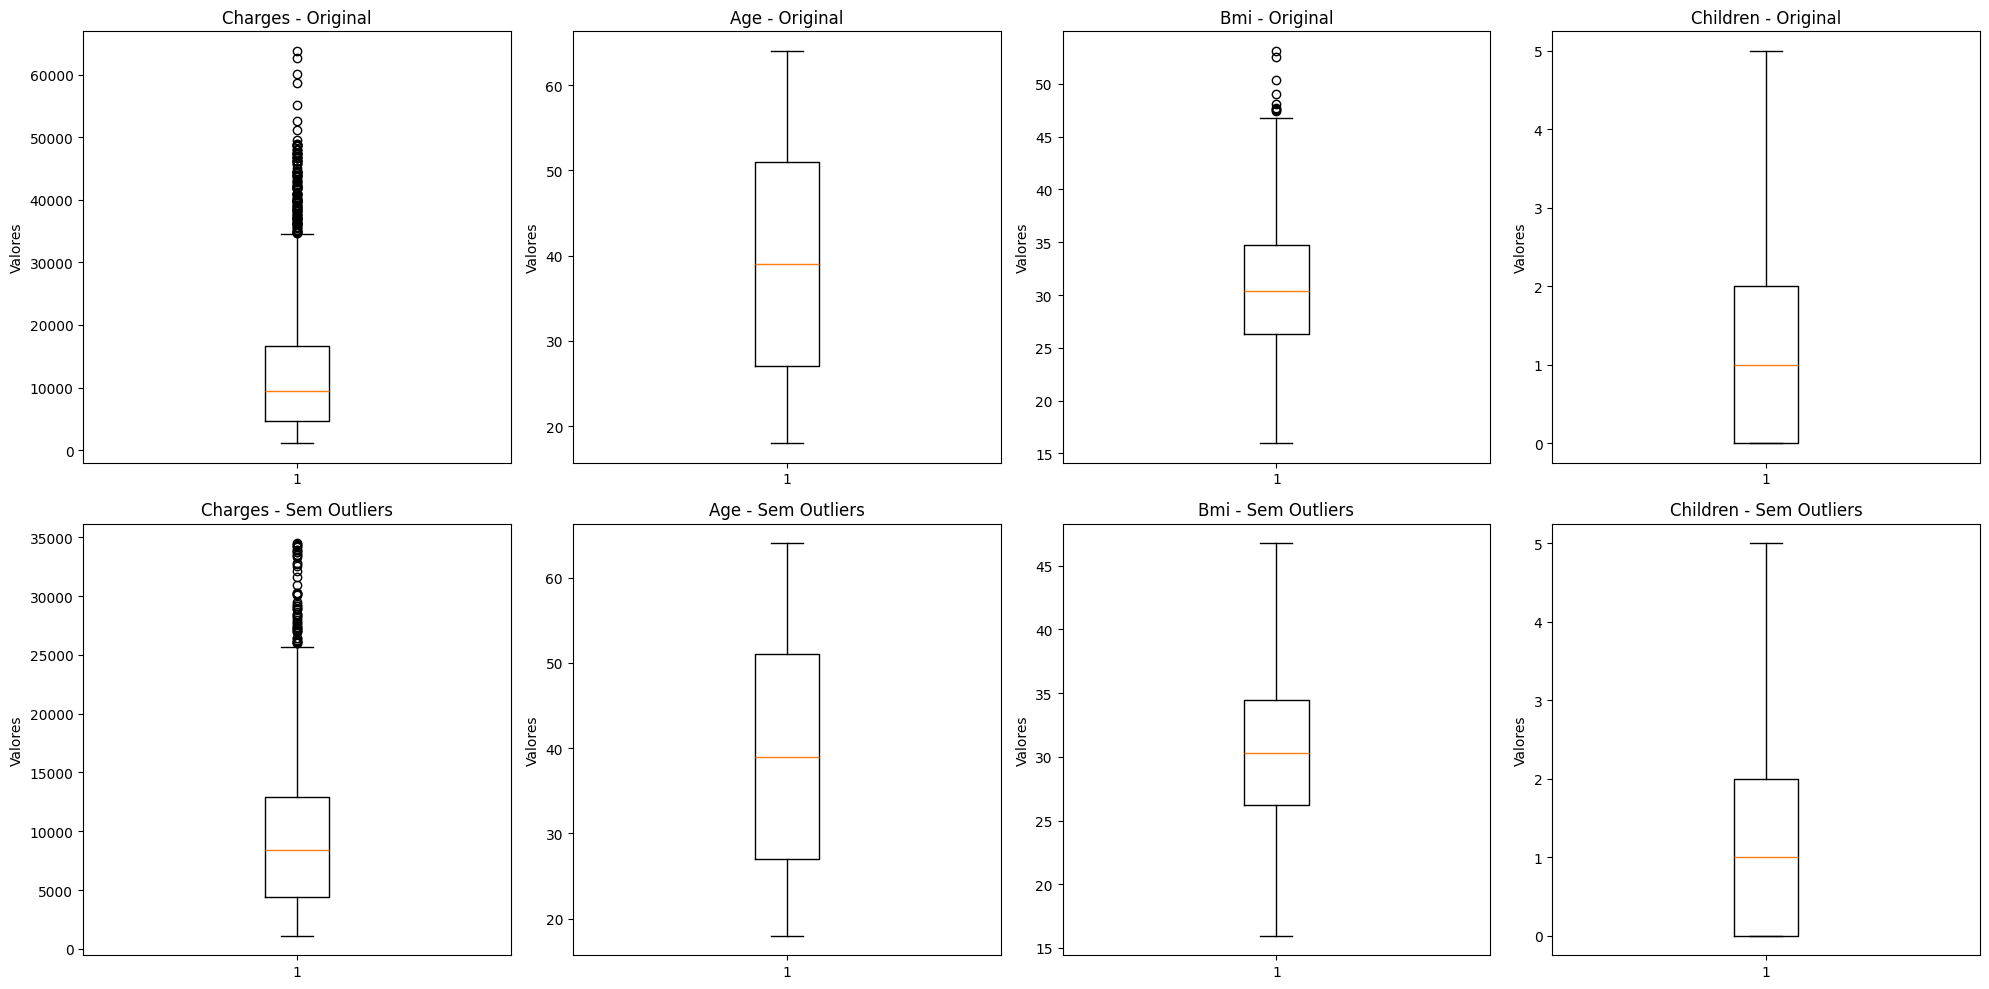

In [23]:
def detect_outliers_iqr(data, column):
    """Detecta outliers usando o método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    """Detecta outliers usando Z-score"""
    z_scores = np.abs(zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

# Análise de outliers para variáveis numéricas
numeric_cols = ['charges', 'age', 'bmi', 'children']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

print("ANÁLISE DE OUTLIERS")

for i, col in enumerate(numeric_cols):
    # Boxplot original
    axes[0, i].boxplot(data[col])
    axes[0, i].set_title(f'{col.title()} - Original')
    axes[0, i].set_ylabel('Valores')
    
    # Detecção de outliers
    outliers_iqr, lower, upper = detect_outliers_iqr(data, col)
    outliers_z = detect_outliers_zscore(data, col)
    
    print(f"\n{col.upper()}:")
    print(f"• Outliers (IQR): {len(outliers_iqr)} ({len(outliers_iqr)/len(data)*100:.1f}%)")
    print(f"• Outliers (Z-score): {len(outliers_z)} ({len(outliers_z)/len(data)*100:.1f}%)")
    print(f"• Limites IQR: [{lower:.2f}, {upper:.2f}]")
    
    # Dados sem outliers (IQR)
    data_no_outliers = data[(data[col] >= lower) & (data[col] <= upper)]
    axes[1, i].boxplot(data_no_outliers[col])
    axes[1, i].set_title(f'{col.title()} - Sem Outliers')
    axes[1, i].set_ylabel('Valores')

plt.tight_layout()
plt.show()

### Matriz de Correlação

A matriz de correlação é uma tabela que mostra as correlações entre diferentes variáveis em um conjunto de dados. A correlação mede a força e a direção do relacionamento linear entre duas variáveis.

Valores de correlação variam de -1 a 1.
* 1: Correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).
* -1: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui).
* 0: Nenhuma correlação (as variáveis não têm relação linear).

Correlação próxima de 1 ou -1 indica uma relação forte.

Correlação próxima de 0 indica uma relação fraca ou inexistente.

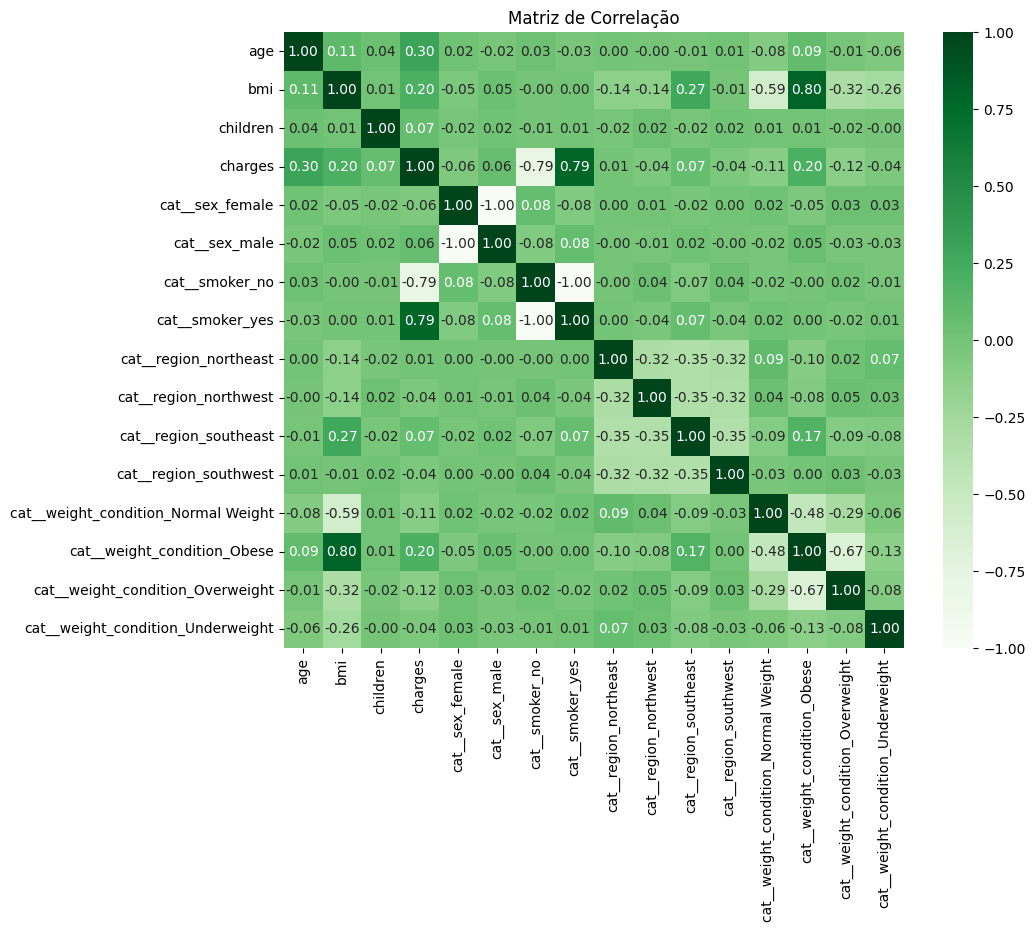

In [24]:
# Matriz de correlação
correlation_matrix = data_encoded.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

* **age** também tem uma correlação positiva significativa, sugerindo que a idade é outro fator importante.
* **sex** tem uma correlação fraca, sugerindo que a sexo não é um fator importante.
* **bmi** tem uma correlação positiva, pode ser revelante (devemos verificar na construção do modelo).
* **children** têm uma correlação moderada.
* **smoker** tem correlação positiva forte com **charges**. Isso indica que ser fumante é o principal fator que aumenta os custos médicos.
* **weight_condition** têm uma correlação fraca negativa, pode ser revelante (devemos verificar na construção do modelo).